In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer


In [6]:
df = pd.read_csv(r'C:\Users\elaru\OneDrive\Desktop\modulo 3\hr_tratado.csv', index_col=0)


In [7]:
corr = df.select_dtypes(include=['number']).corr()
corr

,age,distancefromhome,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,numero_empresas_anteriores,incremento_salario,nivel_trabajo,satisfaccion_relaciones_interpersonales,años_experiencia,cursos,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,salary_month
age,1.000000,-0.003625,0.201536,0.003697,0.036568,0.507748,-0.010725,0.289166,0.006728,0.000464,0.056541,0.555637,-0.031776,0.313718,0.217243,0.195674,0.457597,0.457597
distancefromhome,-0.003625,1.000000,0.027864,-0.010679,0.020938,0.008120,0.004403,-0.007573,0.057036,0.029695,0.010884,-0.000647,-0.051308,0.010439,0.020115,0.013331,-0.014185,-0.014185
education,0.201536,0.027864,1.000000,-0.042834,0.043048,0.100346,-0.006928,0.116021,-0.009138,-0.035674,-0.017287,0.123132,-0.039725,0.070010,0.064238,0.068201,0.090038,0.090038
environmentsatisfaction,0.003697,-0.010679,-0.042834,1.000000,-0.019134,0.010097,0.027344,-0.001402,-0.031253,-0.015015,0.006802,0.015468,-0.041193,0.012143,0.018374,-0.002729,0.009958,0.009958
jobinvolvement,0.036568,0.020938,0.043048,-0.019134,1.000000,-0.000297,-0.020332,0.026374,-0.004661,-0.016212,0.032196,0.020021,-0.012010,-0.015409,-0.015804,0.040507,-0.015106,-0.015106
joblevel,0.507748,0.008120,0.100346,0.010097,-0.000297,1.000000,-0.015388,0.143060,-0.041995,-0.025861,0.020090,0.625832,-0.026059,0.532415,0.342889,0.365260,0.885280,0.885280
jobsatisfaction,-0.010725,0.004403,-0.006928,0.027344,-0.020332,-0.015388,1.000000,-0.054967,0.027774,-0.009991,-0.009203,-0.024280,0.003339,-0.006868,-0.017183,-0.034596,0.000019,0.000019
numero_empresas_anteriores,0.289166,-0.007573,0.116021,-0.001402,0.026374,0.143060,-0.054967,1.000000,-0.003378,-0.005196,0.060352,0.211779,-0.080868,-0.129465,-0.045365,-0.119690,0.108920,0.108920
incremento_salario,0.006728,0.057036,-0.009138,-0.031253,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.721070,-0.035446,-0.034856,-0.006836,-0.041213,-0.022511,-0.010821,-0.033716,-0.033716
nivel_trabajo,0.000464,0.029695,-0.035674,-0.015015,-0.016212,-0.025861,-0.009991,-0.005196,0.721070,1.000000,-0.002972,-0.007803,-0.025763,-0.006677,0.023926,0.013746,-0.026464,-0.026464


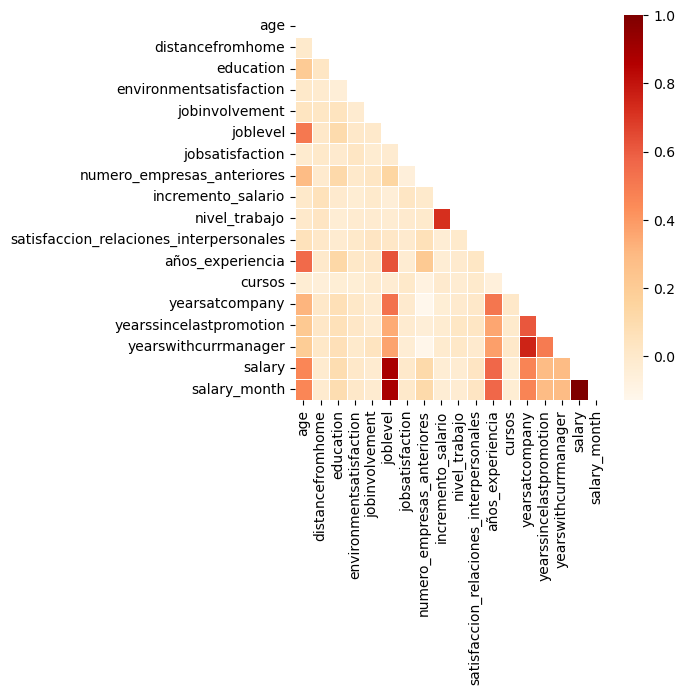

In [8]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(5, 5))  # Tamaño de la figura
sns.heatmap(corr, cmap='OrRd', linewidths=0.5, mask = mask) #grosor linea
# Título
plt.title("")
# Mostrar la gráfica
plt.show()

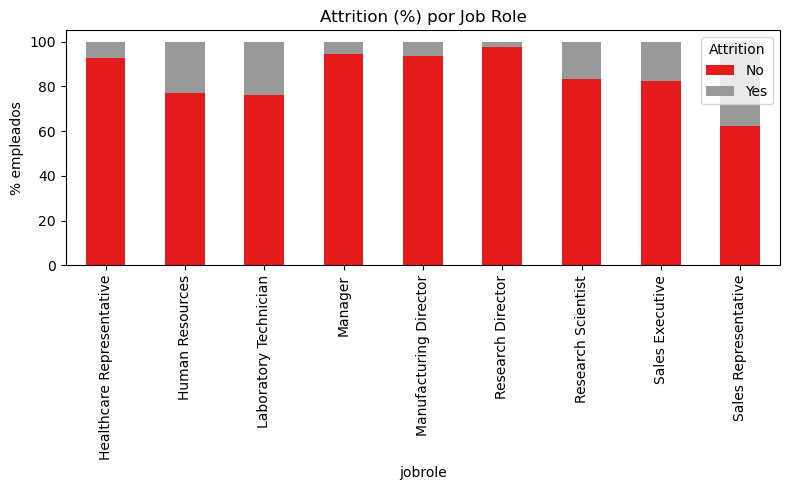

In [ ]:
tab = pd.crosstab(df['jobrole'], df['attrition'], normalize='index') * 100
# tabla de frecuencias a porcentaje.crea una tabla de contingencia (cruzando dos columnas).
#Filas = categorías de jobrole.
#Columnas = categorías de attrition (Yes/No).
#normalize='index'cada fila se divide entre su total proporciones por rol * 100 convierte esas proporciones en porcentajes.

# La barra apilada responde a “¿qué % se va en cada categoría?”.
tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Set1")
plt.ylabel('% empleados')
plt.title('Attrition (%) por Job Role')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()
#crea un gráfico a partir de la tabla.
#kind='bar'gráfico de barras verticales.
#stacked=True cada barra se apila (parte Yes + parte No suman 100%).
#figsize=(8,5) tamaño de la figura.
#colormap="Set1"paleta de colores.

barras apiladas: Dentro de cada categoría (ej. Job Role o Work-Life Balance), la barra representa el 100% de empleados.
El color indica qué porcentaje se quedó (Attrition = No) y qué porcentaje se fue (Attrition = Yes).
sirve para comparar la rotación relativa en grupos de distintos tamaños.Una categórica en el eje X + otra categórica como color/segmento.
No “unen” las variables, sino que comparan proporciones de una dentro de otra.

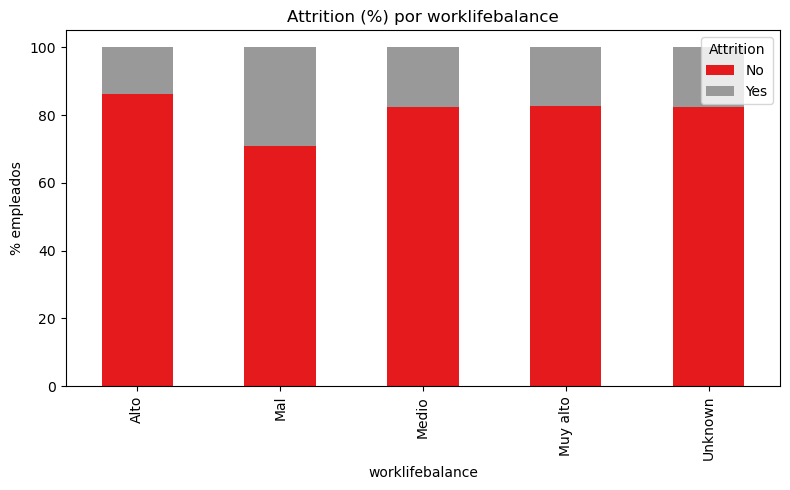

In [ ]:
# tabla de frecuencias crea una tabla cruzada entre dos columnas categóricas.
# Filas = categorías de worklifebalance.Columnas = categorías de attrition (Yes/No).
#normalize='index' normaliza cada fila para que sume 1.convierte a porcentajes.
#Genera un gráfico de barras.#kind='bar'tipo barras verticales.
# stacked=True apila los segmentos (Yes/No) en cada barra.figsize=(8,5)tamaño de la figura en pulgadas.
#colormap="Set1" paleta de colores de matplotlib/seaborn.

tab = pd.crosstab(df['worklifebalance'], df['attrition'], normalize='index') * 100 
tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Set1")
plt.ylabel('% empleados')
plt.title('Attrition (%) por worklifebalance')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

Barra apilada (stacked bar)
Muestra cada categoría de Work-Life Balance como una barra que suma 100%.
Dentro de la barra, ves proporción de Attrition Yes/No.
Es muy clara para comparar rápidamente “qué porcentaje se va en cada grupo”.
Ventaja: fácil de entender para cualquier persona, incluso sin formación técnica.

¿cómo se comporta una variable numérica frente a roles y rotación?
Violin plot (Salary × Job Role separado por Attrition)

muestra la distribución completa de salarios por rol de trabajo, comparando entre quienes se van y quienes se quedan.
La forma del “violín” enseña concentración y dispersión. La línea interna marca la mediana y cuartiles.

Sirve para ver diferencias en salario asociadas a la rotación.Si en un rol los que se van suelen tener salarios más bajos que los que se quedan.
Detectar dispersión de sueldos dentro del mismo job role.

El violín combina la información de un boxplot (mediana/cuartiles) con la de un histograma (densidad), y por eso es más rico para entender salarios y attrition.

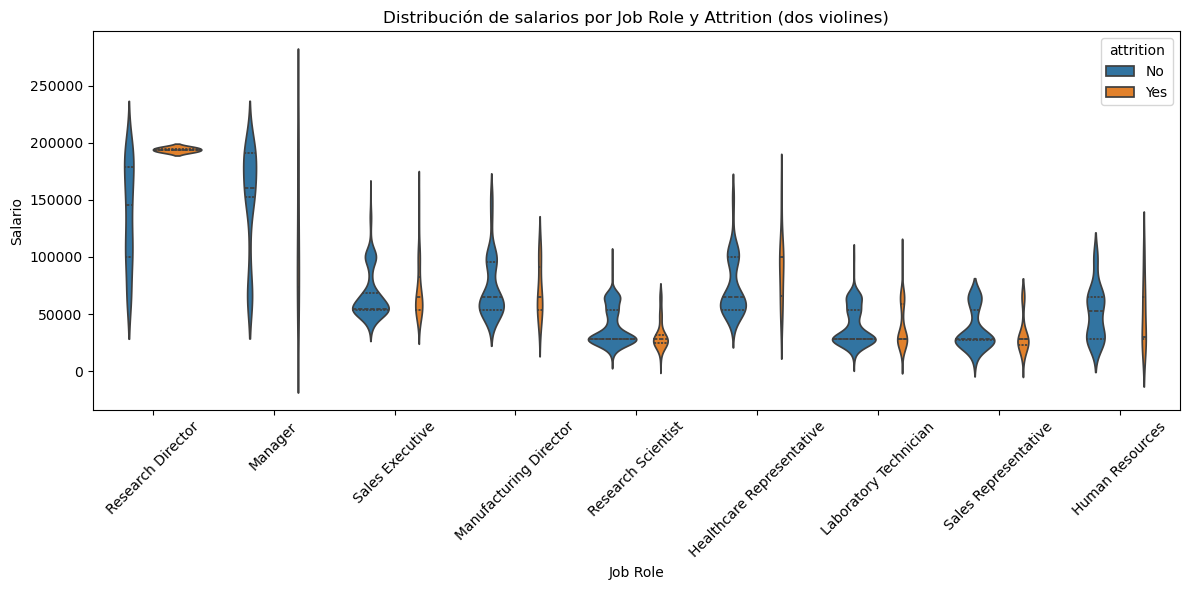

In [12]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='jobrole', y='salary', hue='attrition',
               inner="quartile", dodge=True)  # dodge=True = dos violines separados
plt.xticks(rotation=45)
plt.ylabel("Salario")
plt.xlabel("Job Role")
plt.title("Distribución de salarios por Job Role y Attrition (dos violines)")
plt.tight_layout()
plt.show()


Cada job role aparece duplicado (No a un lado, Yes al otro).
Más claro para ver la forma de cada distribución por separado.
Permite comparar mejor las diferencias de dispersión y mediana.
Deja muy claro cómo son las distribuciones de salario de los que se van vs los que se quedan en cada rol.

Para roles como Research Director o Manager, la distribución de salarios de quienes se van parece más alta que la de los que se quedan .
En los roles ( Sales Representative, Laboratory Technician), los que se van (Yes) están más concentrados en los salarios bajos.
En la mayoría de roles, los que se quedan (No) tienen más dispersión y abarcan toda la franja salarial, mientras que los que se van (Yes) están más concentrados en un tramo.
No es un patrón único para todos los roles. En algunos puestos se marchan los directivos, en otros los de abajo (comerciales/junior).
Esto sugiere que las razones de rotación son diferentes según el rol:
En roles altos: puede ser ambición, falta de reconocimiento, mejores ofertas.
En roles bajos: puede ser insatisfacción con salario base, falta de motivación o progresión.

No podemos explicar la rotación solo con el salario. Depende del rol: los perfiles de entrada se van por salarios bajos, pero también pierden talento alto por razones distintas. Hay que analizar causas diferenciadas por categoría de puesto.

graficas diferentes que me parecieron originales y faciles.

<Axes: xlabel='distancefromhome', ylabel='Density'>

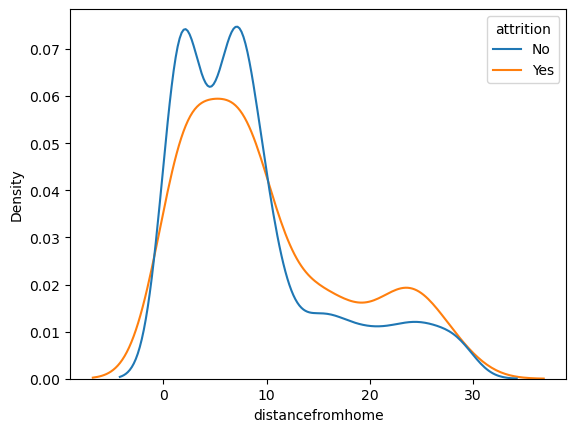

In [ ]:
sns.kdeplot(data=df, x="distancefromhome", hue="attrition", common_norm=False)
#KDE plot (Kernel Density Estimation) es una curva suave que representa la distribución de una variable numérica. Es como un histograma, pero continuo.
#hue="attrition", dibuja dos curvas, una para los empleados que se quedan (No) y otra para los que se van (Yes).
#Es útil porque no solo muestra la media, sino toda la forma de la distribución.

(tanto los que se quedan = No,como los que se van = Yes) tienen su mayor concentración en distancias muy bajas (0–5 km aprox.).
Las curvas casi se solapadan y no hay un desplazamiento fuerte que indique que “irse” esté asociado a vivir más lejos.
La distancia a casa no es un factor decisivo de la rotación en esta empresa.
La mayoría vive cerca del trabajo.
Asi que los motivos de rotación hay que buscarlos en otras variables (satisfacción, salario, rol, oportunidades de promoción)

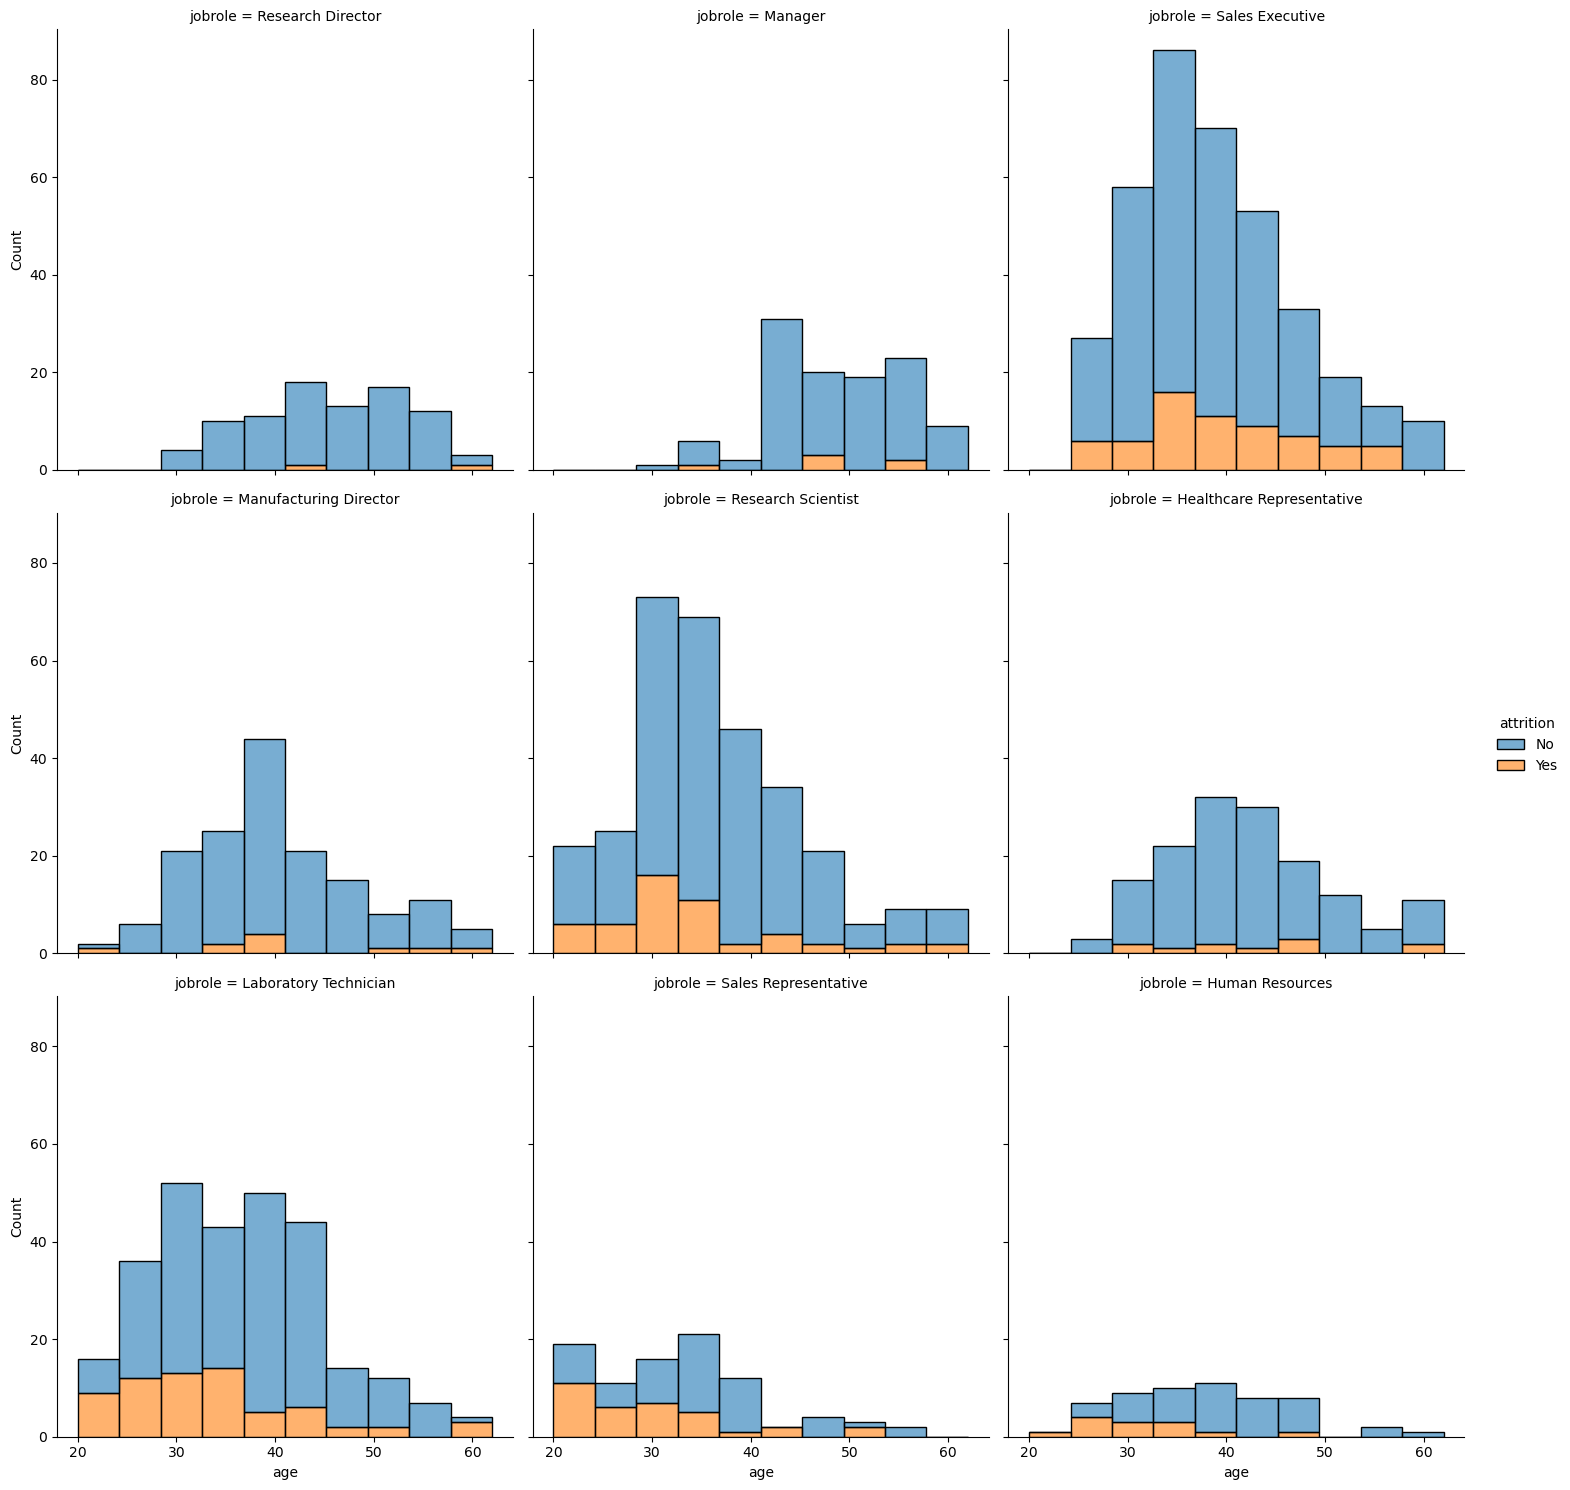

In [ ]:
#Es como tener un histograma de edades separado por rol y coloreado por rotación.
sns.displot(data=df, x="age", bins=10,
            hue="attrition", col="jobrole",
            col_wrap=3, multiple="stack", alpha=0.6)
plt.show()




Si en un panel ves que las barras naranjas (Yes) son altas en edades bajas ese rol pierde más jóvenes.
Si las naranjas aparecen más en edades altas,pierde gente más veterana.
Si las naranjas son pocas en general ese rol apenas sufre rotación.
Es como tener un histograma de edades separado por rol y coloreado por rotación.
la rotación no ocurre igual en todos los puestos.Esto confirma que la edad influye de forma distinta según el rol.

<Axes: xlabel='attrition', ylabel='count'>

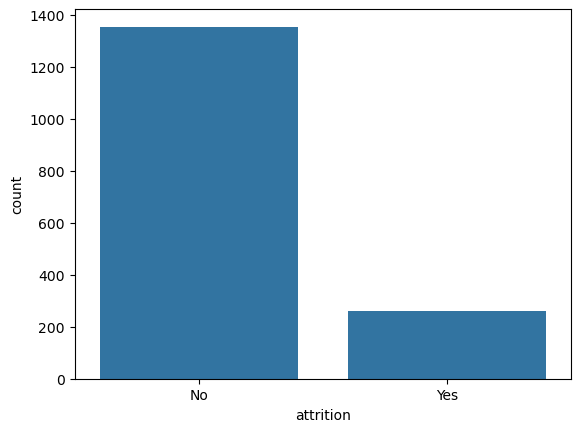

In [ ]:
sns.countplot(x="attrition", data=df)

<Axes: xlabel='gender', ylabel='count'>

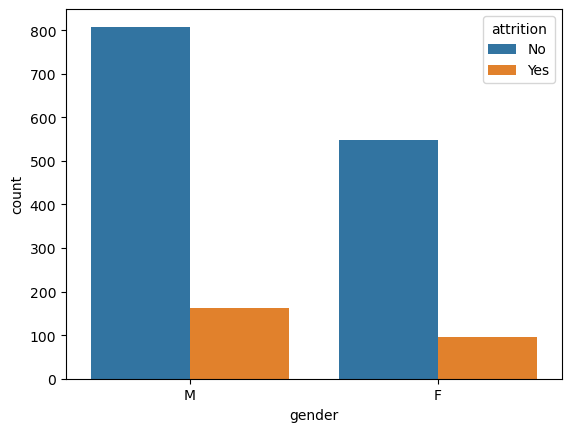

In [ ]:
sns.countplot(x="gender", hue="attrition", data=df)

<Axes: xlabel='salary', ylabel='satisfaccion_relaciones_interpersonales'>

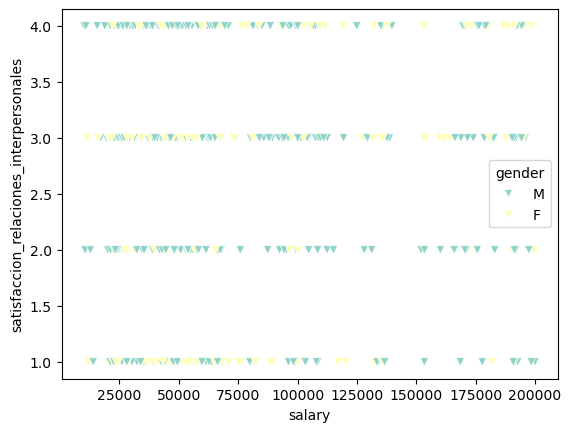

In [ ]:
sns.scatterplot(x='salary', y='satisfaccion_relaciones_interpersonales', data=df, palette='Set3', marker='v', hue='gender')

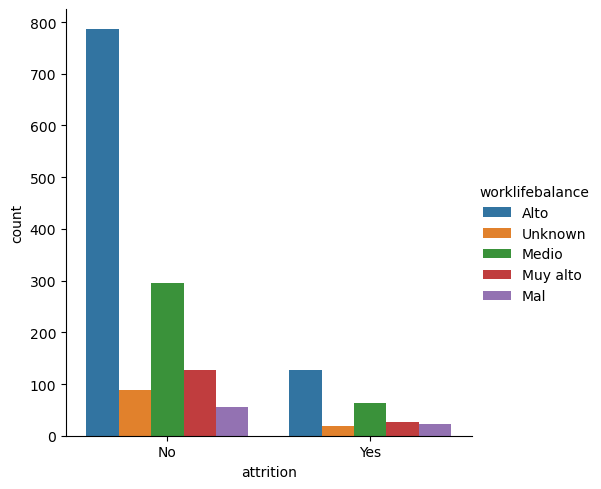

In [ ]:
sns.catplot(x="attrition", hue="worklifebalance", kind="count", data=df)

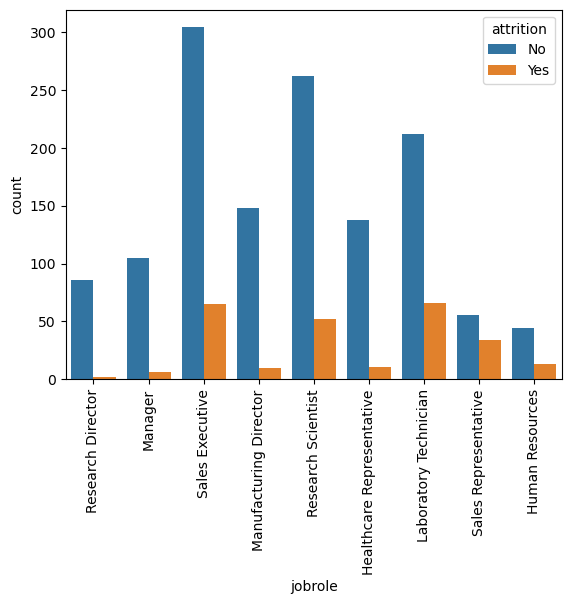

In [ ]:
sns.countplot(x="jobrole", hue="attrition", data=df)
plt.xticks(rotation=90)
plt.show();

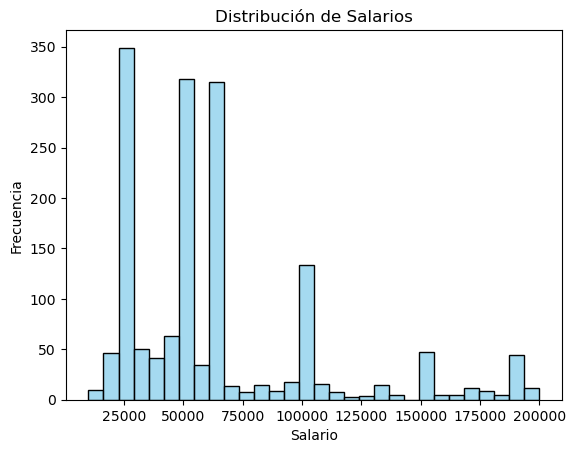

In [ ]:
sns.histplot(df['salary'], bins=30, color='skyblue')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show();

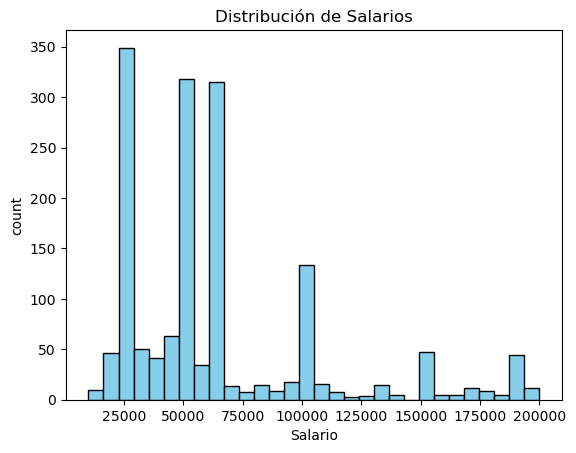

In [ ]:
plt.hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('count')
plt.show();